In [1]:
import scanpy as sc

In [2]:
from sklearn.cluster import KMeans

In [3]:
import numpy as np
from scipy.stats import entropy

In [4]:
import matplotlib.pyplot as plt

In [5]:
print(sc.__version__)

1.9.2


In [6]:
import configparser

# Read configuration file
config = configparser.ConfigParser()
config.read("../../utils/config.ini")

rawPath = config.get("DEFAULT", "rawPath")

initDir = rawPath + 'atlas_annotated/'

In [7]:
cancer = sc.read_h5ad(initDir + 'atlas_cancer_embeddings.h5ad')

In [8]:
cancer.obs

,ID,sample_name,tissue,developmental_stage,treatment,recurrence,tumor_stage,paper_ID,anatomical_location,patient_id,...,total_counts_mt,pct_counts_mt,CancerMSK,EndothelialMSK,FibroblastsMSK,HematopoieticMSK,cell_labels_ratio,max,assignment,leiden-1.8
AAACCTGAGACTTGAA-1-T59,T59,GSM4675273,Metastasis,Advanced stage,CHT,Recurrence,IV,Geistlinger_59,Omentum,NaN,...,122.0,9.370199,0.573949,0.271034,0.150646,-0.859225,1.361101,CancerMSK,CancerMSK,39
AAACCTGCACACCGCA-1-T59,T59,GSM4675273,Metastasis,Advanced stage,CHT,Recurrence,IV,Geistlinger_59,Omentum,NaN,...,4444.0,9.899094,1.167978,-0.047284,0.487113,-1.470363,2.397757,CancerMSK,CancerMSK,24
AAACCTGTCCGGCACA-1-T59,T59,GSM4675273,Metastasis,Advanced stage,CHT,Recurrence,IV,Geistlinger_59,Omentum,NaN,...,65.0,6.792059,0.124351,0.049115,0.099754,-0.826442,0.835305,CancerMSK,CancerMSK,3
AAACCTGTCGGCGGTT-1-T59,T59,GSM4675273,Metastasis,Advanced stage,CHT,Recurrence,IV,Geistlinger_59,Omentum,NaN,...,296.0,8.136339,1.557208,-0.085818,0.785574,-1.310645,1.982256,CancerMSK,CancerMSK,24
AAACGGGAGGCACATG-1-T59,T59,GSM4675273,Metastasis,Advanced stage,CHT,Recurrence,IV,Geistlinger_59,Omentum,NaN,...,752.0,19.331619,0.991994,0.092564,0.751106,-1.311807,1.175807,CancerMSK,CancerMSK,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SPECTRUM-OV-118_S1_CD45N_PELVIC_PERITONEUM_TTTGGTTTCTGGGCCA,NaN,NaN,Metastasis,Advanced stage,Naive,Unknown,IVB,Vasquez_118,Peritoneum,SPECTRUM-OV-118,...,1554.0,21.505672,1.170240,-0.223300,-0.089026,-1.284106,1.170240,CancerMSK,HematopoieticMSK,48
SPECTRUM-OV-118_S1_CD45N_PELVIC_PERITONEUM_TTTGTTGAGGTCTGGA,NaN,NaN,Metastasis,Advanced stage,Naive,Unknown,IVB,Vasquez_118,Peritoneum,SPECTRUM-OV-118,...,2210.0,25.014147,1.300668,-0.187025,-0.140951,-1.446519,1.300668,CancerMSK,HematopoieticMSK,48
SPECTRUM-OV-118_S1_CD45N_PELVIC_PERITONEUM_TTTGTTGCACGTCTCT,NaN,NaN,Metastasis,Advanced stage,Naive,Unknown,IVB,Vasquez_118,Peritoneum,SPECTRUM-OV-118,...,260.0,14.857143,1.131369,0.055238,-0.153193,-1.350754,20.481843,CancerMSK,HematopoieticMSK,51
SPECTRUM-OV-118_S1_CD45N_PELVIC_PERITONEUM_TTTGTTGCACTTGAAC,NaN,NaN,Metastasis,Advanced stage,Naive,Unknown,IVB,Vasquez_118,Peritoneum,SPECTRUM-OV-118,...,589.0,9.557034,1.097371,-0.007790,-0.188808,-1.295135,1.097371,CancerMSK,HematopoieticMSK,48


In [9]:
cancer

AnnData object with n_obs × n_vars = 401106 × 17063
    obs: 'ID', 'sample_name', 'tissue', 'developmental_stage', 'treatment', 'recurrence', 'tumor_stage', 'paper_ID', 'anatomical_location', 'patient_id', 'dataset', 'cell_type', 'cell_subtype', 'sample_ID', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'CancerMSK', 'EndothelialMSK', 'FibroblastsMSK', 'HematopoieticMSK', 'cell_labels_ratio', 'max', 'assignment', 'leiden-1.8'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

/home/marta.sallese/ov_cancer_atlas/miniconda3/envs/seacells/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


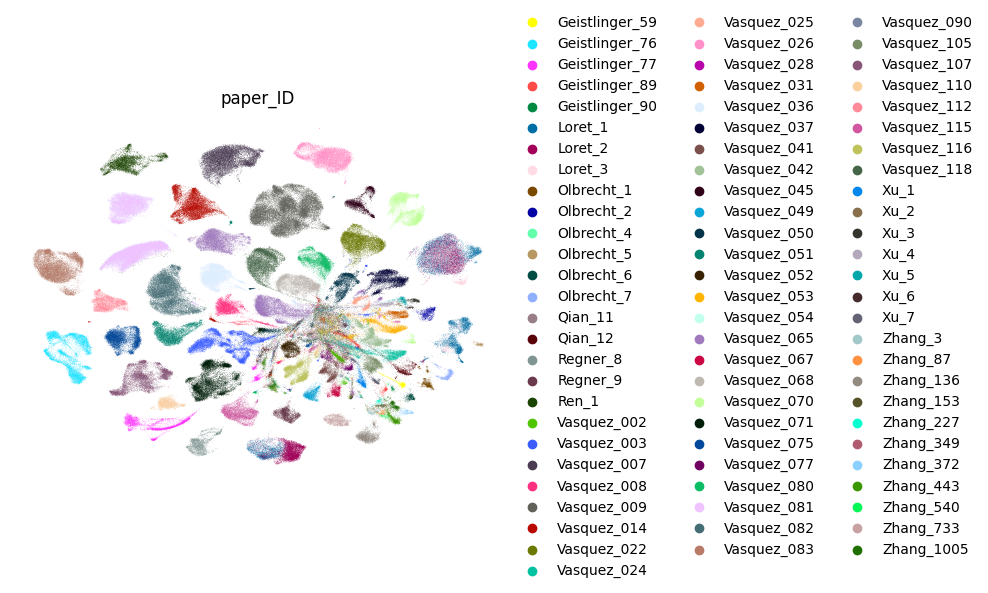

In [10]:
sc.pl.umap(cancer, color='paper_ID', frameon=False)

/home/marta.sallese/ov_cancer_atlas/miniconda3/envs/seacells/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


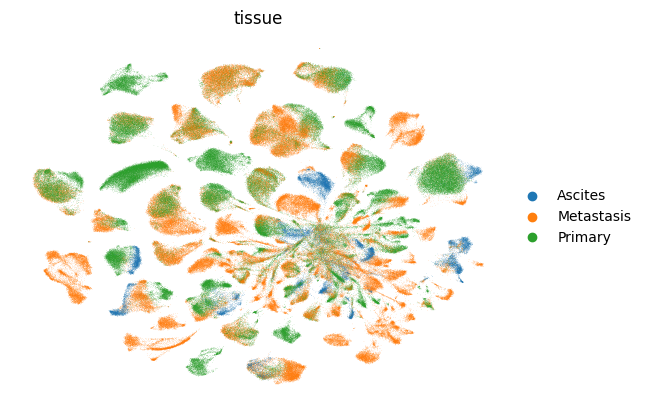

In [26]:
sc.pl.umap(cancer, color='tissue', frameon=False)

In [11]:
endo = sc.read_h5ad(initDir + 'atlas_endothelial_embeddings.h5ad')

/home/marta.sallese/ov_cancer_atlas/miniconda3/envs/seacells/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


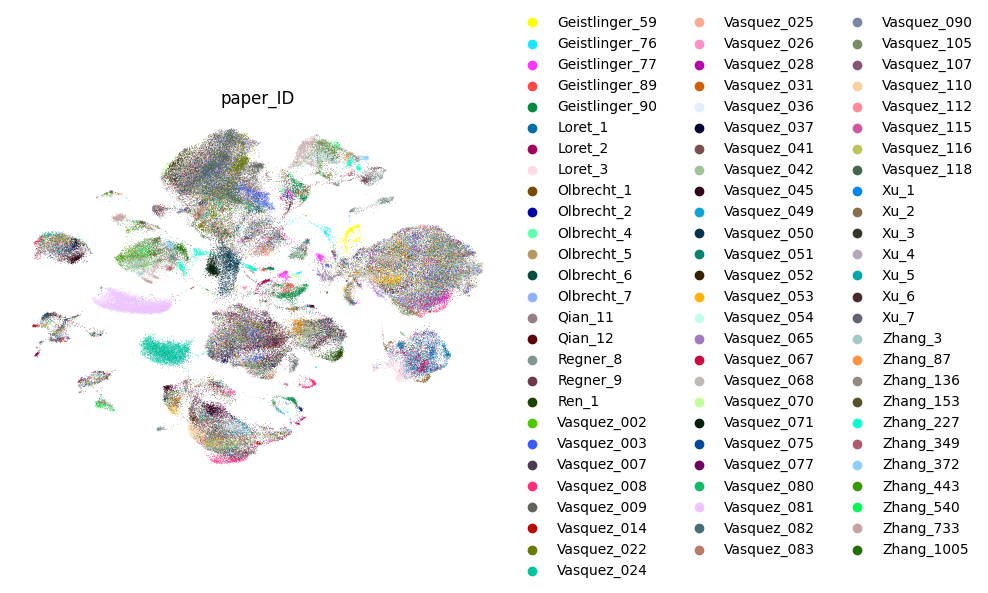

In [12]:
sc.pl.umap(endo, color='paper_ID', frameon=False)

In [19]:
def plot_elbow_method(data, max_clusters=79):
    distortions = []
    for i in range(1, max_clusters+1):
        kmeans = KMeans(n_clusters=i, random_state=0).fit(data)
        distortions.append(kmeans.inertia_)
    
    plt.figure(figsize=(8, 4))
    plt.plot(range(1, max_clusters+1), distortions, marker='o')
    plt.title('Elbow Method For Optimal k')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.show()

/home/marta.sallese/ov_cancer_atlas/miniconda3/envs/seacells/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/marta.sallese/ov_cancer_atlas/miniconda3/envs/seacells/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/marta.sallese/ov_cancer_atlas/miniconda3/envs/seacells/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/marta.sallese/ov_cancer_atlas/miniconda3/envs/seacells/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value 

/home/marta.sallese/ov_cancer_atlas/miniconda3/envs/seacells/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/marta.sallese/ov_cancer_atlas/miniconda3/envs/seacells/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/marta.sallese/ov_cancer_atlas/miniconda3/envs/seacells/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/marta.sallese/ov_cancer_atlas/miniconda3/envs/seacells/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value 

/home/marta.sallese/ov_cancer_atlas/miniconda3/envs/seacells/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/marta.sallese/ov_cancer_atlas/miniconda3/envs/seacells/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/marta.sallese/ov_cancer_atlas/miniconda3/envs/seacells/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/marta.sallese/ov_cancer_atlas/miniconda3/envs/seacells/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value 

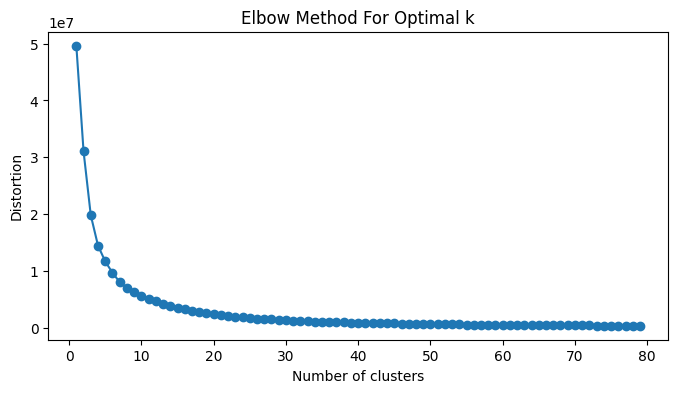

/home/marta.sallese/ov_cancer_atlas/miniconda3/envs/seacells/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/marta.sallese/ov_cancer_atlas/miniconda3/envs/seacells/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/marta.sallese/ov_cancer_atlas/miniconda3/envs/seacells/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/marta.sallese/ov_cancer_atlas/miniconda3/envs/seacells/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value 

/home/marta.sallese/ov_cancer_atlas/miniconda3/envs/seacells/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/marta.sallese/ov_cancer_atlas/miniconda3/envs/seacells/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/marta.sallese/ov_cancer_atlas/miniconda3/envs/seacells/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/marta.sallese/ov_cancer_atlas/miniconda3/envs/seacells/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value 

/home/marta.sallese/ov_cancer_atlas/miniconda3/envs/seacells/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/marta.sallese/ov_cancer_atlas/miniconda3/envs/seacells/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/marta.sallese/ov_cancer_atlas/miniconda3/envs/seacells/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/marta.sallese/ov_cancer_atlas/miniconda3/envs/seacells/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value 

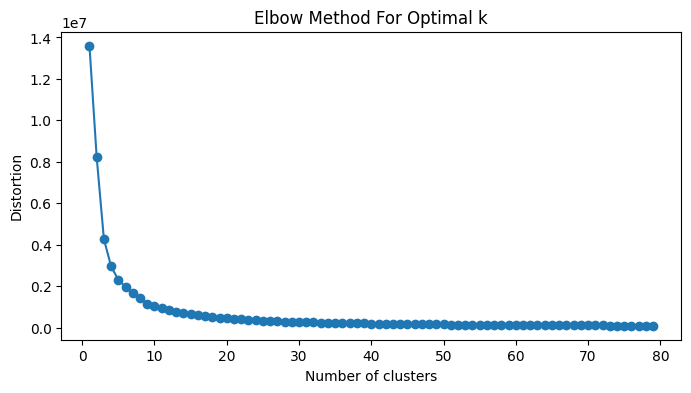

In [20]:
# Plot elbow method for UMAP 1
plot_elbow_method(cancer.obsm['X_umap'])

# Plot elbow method for UMAP 2
plot_elbow_method(endo.obsm['X_umap'])

In [22]:
cancer.obs.paper_ID.unique()

['Geistlinger_59', 'Geistlinger_76', 'Geistlinger_77', 'Geistlinger_89', 'Geistlinger_90', ..., 'Vasquez_026', 'Vasquez_022', 'Vasquez_007', 'Vasquez_116', 'Vasquez_118']
Length: 79
Categories (79, object): ['Geistlinger_59', 'Geistlinger_76', 'Geistlinger_77', 'Geistlinger_89', ..., 'Zhang_443', 'Zhang_540', 'Zhang_733', 'Zhang_1005']

In [23]:
endo.obs.paper_ID.unique()

['Geistlinger_59', 'Geistlinger_76', 'Geistlinger_77', 'Geistlinger_89', 'Geistlinger_90', ..., 'Vasquez_026', 'Vasquez_022', 'Vasquez_007', 'Vasquez_116', 'Vasquez_118']
Length: 79
Categories (79, object): ['Geistlinger_59', 'Geistlinger_76', 'Geistlinger_77', 'Geistlinger_89', ..., 'Zhang_443', 'Zhang_540', 'Zhang_733', 'Zhang_1005']

### Compute entropy

In [13]:
def calculate_patient_entropy(adata, patient_col):
    patient_ids = adata.obs[patient_col]
    unique_patients = np.unique(patient_ids)
    patient_entropies = []

    for patient in unique_patients:
        # Get cell indices for the current patient
        patient_indices = np.where(patient_ids == patient)[0]
        # Get counts of cells for this patient
        patient_count = len(patient_indices)
        # Calculate the entropy for this patient
        patient_entropy = entropy([patient_count])
        patient_entropies.append(patient_entropy)

    return patient_entropies, patient_ids

In [14]:
def weighted_average_entropy(patient_ids, patient_entropies):
    unique_patients, counts = np.unique(patient_ids, return_counts=True)
    total_samples = len(patient_ids)
    weighted_entropy = np.sum((counts / total_samples) * patient_entropies)
    return weighted_entropy

In [15]:
# Extract patient IDs and calculate entropies for cancer data
patient_entropies_cancer, patient_ids_cancer = calculate_patient_entropy(cancer, 'paper_ID')
# Compute weighted average entropy for cancer data
weighted_entropy_cancer = weighted_average_entropy(patient_ids_cancer, patient_entropies_cancer)

In [20]:
patient_ids = cancer.obs.paper_ID.unique()

In [23]:
patient_indices = np.where(patient_ids == 'Geistlinger_59')

In [24]:
patient_indices

(array([0]),)

In [27]:
# Extract patient IDs and calculate entropies for endo data
patient_entropies_endo, patient_ids_endo = calculate_patient_entropy(endo, 'paper_ID')
# Compute weighted average entropy for endo data
weighted_entropy_endo = weighted_average_entropy(patient_ids_endo, patient_entropies_endo)

In [28]:
print(f"Weighted Average Entropy for Cancer Data: {weighted_entropy_cancer}")

Weighted Average Entropy for Cancer Data: 0.0


In [29]:
print(f"Weighted Average Entropy for Endo Data: {weighted_entropy_endo}")

Weighted Average Entropy for Endo Data: 0.0


### Try another method...

In [30]:
# Define the number of clusters
n_clusters = 79  # Example: Adjust based on your data

# Perform k-means clustering on the UMAP embeddings
kmeans_cancer = KMeans(n_clusters=n_clusters, random_state=0).fit(cancer.obsm['X_umap'])
kmeans_endo = KMeans(n_clusters=n_clusters, random_state=0).fit(endo.obsm['X_umap'])

# Get the cluster labels
cluster_labels_cancer = kmeans_cancer.labels_
cluster_labels_endo = kmeans_endo.labels_

/home/marta.sallese/ov_cancer_atlas/miniconda3/envs/seacells/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/marta.sallese/ov_cancer_atlas/miniconda3/envs/seacells/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [33]:
(cluster_labels_cancer)

array([63, 53, 63, ..., 71, 71, 25], dtype=int32)

In [34]:
cluster_labels_endo

array([47, 47, 47, ...,  2, 21, 55], dtype=int32)

In [42]:
??entropy

In [35]:
# Calculate entropy for each cluster
def calculate_cluster_entropy(cluster_labels, patient_labels):
    unique_clusters = np.unique(cluster_labels)
    cluster_entropies = []

    for cluster in unique_clusters:
        # Get patient labels for the current cluster
        cluster_indices = np.where(cluster_labels == cluster)[0]
        cluster_patient_labels = patient_labels[cluster_indices]

        # Calculate the entropy of the patient label distribution within this cluster
        label_counts = np.bincount(cluster_patient_labels)
        cluster_entropy = entropy(label_counts)
        cluster_entropies.append(cluster_entropy)

    return cluster_entropies

In [38]:
patient_labels_cancer = cancer.obs.paper_ID.unique()
patient_labels_endo = endo.obs.paper_ID.unique()

In [40]:
# Assuming patient_labels1 and patient_labels2 are your patient labels
cluster_entropies_cancer = calculate_cluster_entropy(cluster_labels_cancer, patient_labels_cancer)
cluster_entropies_endo = calculate_cluster_entropy(cluster_labels_endo, patient_labels_endo)

IndexError: index 314 is out of bounds for axis 0 with size 79

In [ ]:
def calculate_cluster_entropy(cluster_labels, patient_labels):
    unique_clusters = np.unique(cluster_labels)
    cluster_entropies = []

    for cluster in unique_clusters:
        # Get patient labels for the current cluster
        cluster_indices = np.where(cluster_labels == cluster)[0]
        cluster_patient_labels = patient_labels[cluster_indices]

        # Calculate the entropy of the patient label distribution within this cluster
        label_counts = np.bincount(cluster_patient_labels)
        cluster_entropy = entropy(label_counts)
        cluster_entropies.append(cluster_entropy)

    return cluster_entropies

def weighted_average_entropy(cluster_labels, cluster_entropies):
    unique_clusters, counts = np.unique(cluster_labels, return_counts=True)
    total_samples = len(cluster_labels)
    weighted_entropy = np.sum((counts / total_samples) * cluster_entropies)
    return weighted_entropy

# Assuming you have UMAP coordinates and patient labels
umap_coords1 = # your UMAP 1 coordinates
umap_coords2 = # your UMAP 2 coordinates
patient_labels1 = # your patient labels for UMAP 1
patient_labels2 = # your patient labels for UMAP 2

# Define the number of clusters
n_clusters = 5  # Example: Adjust based on your data

# Perform k-means clustering on the UMAP embeddings
kmeans1 = KMeans(n_clusters=n_clusters, random_state=0).fit(umap_coords1)
kmeans2 = KMeans(n_clusters=n_clusters, random_state=0).fit(umap_coords2)

# Get the cluster labels
cluster_labels1 = kmeans1.labels_
cluster_labels2 = kmeans2.labels_

# Calculate cluster entropies
cluster_entropies1 = calculate_cluster_entropy(cluster_labels1, patient_labels1)
cluster_entropies2 = calculate_cluster_entropy(cluster_labels2, patient_labels2)

# Compute weighted average entropy
weighted_entropy1 = weighted_average_entropy(cluster_labels1, cluster_entropies1)
weighted_entropy2 = weighted_average_entropy(cluster_labels2, cluster_entropies2)

print(f"Weighted Average Entropy for UMAP 1: {weighted_entropy1}")
print(f"Weighted Average Entropy for UMAP 2: {weighted_entropy2}")